## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [15]:
import os
import keras
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [16]:
train, test = keras.datasets.cifar10.load_data()

In [17]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [18]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [21]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0718 23:22:00.373604  4140 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 23:22:00.376597  4140 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 23:22:00.455120  4140 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 23:22:00.572121  4140 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, whic

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8311 - acc: 0.3437 - val_loss: 1.6643 - val_acc: 0.4107
Epoch 2/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6041 - acc: 0.4315 - val_loss: 1.6750 - val_acc: 0.4157
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5177 - acc: 0.4627 - val_loss: 1.6306 - val_acc: 0.4252
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4514 - acc: 0.4846 - val_loss: 1.5429 - val_acc: 0.4525
Epoch 5/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.4081 - acc: 0.4996 - val_loss: 1.4692 - val_acc: 0.4762
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.3648 - acc: 0.5140 - val_loss: 1.5213 - val_acc: 0.4627
Epoch 7/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.3244 - acc: 0.5283 - val_loss: 1.4144 - val_acc

50000/50000 [==============================] - 3s 60us/step - loss: 1.8037 - acc: 0.3695 - val_loss: 1.7542 - val_acc: 0.3831
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7186 - acc: 0.3988 - val_loss: 1.6869 - val_acc: 0.4073
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6551 - acc: 0.4213 - val_loss: 1.6308 - val_acc: 0.4305
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6066 - acc: 0.4380 - val_loss: 1.6175 - val_acc: 0.4248
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5683 - acc: 0.4523 - val_loss: 1.5747 - val_acc: 0.4465
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5358 - acc: 0.4641 - val_loss: 1.5374 - val_acc: 0.4576
Epoch 8/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5059 - acc: 0.4742 - val_loss: 1.5161 - val_acc: 0.4664
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9713 - acc: 0.3091 - val_loss: 1.9498 - val_acc: 0.3173
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9312 - acc: 0.3262 - val_loss: 1.9163 - val_acc: 0.3320
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9014 - acc: 0.3377 - val_loss: 1.8900 - val_acc: 0.3362
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8772 - acc: 0.3468 - val_loss: 1.8693 - val_acc: 0.3428
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.8575 - acc: 0.3533 - val_loss: 1.8507 - val_acc: 0.3534
Epoch 9/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.8404 - acc: 0.3593 - val_loss: 1.8365 - val_acc: 0.3588
Epoch 10/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8261 - acc: 0.3631 - val_loss: 1.8228 - val_acc: 0.3598
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 3s 57us/step - loss: 2.2085 - acc: 0.1993 - val_loss: 2.2015 - val_acc: 0.2043
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.1933 - acc: 0.2103 - val_loss: 2.1871 - val_acc: 0.2148
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.1794 - acc: 0.2189 - val_loss: 2.1738 - val_acc: 0.2218
Epoch 8/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.1666 - acc: 0.2258 - val_loss: 2.1614 - val_acc: 0.2289
Epoch 9/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.1545 - acc: 0.2331 - val_loss: 2.1498 - val_acc: 0.2344
Epoch 10/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.1431 - acc: 0.2379 - val_loss: 2.1388 - val_acc: 0.2397
Epoch 11/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.1323 - acc: 0.2439 - val_loss: 2.1284 - val_acc: 0.2436
Epoch 12/50
50000/50000 [=========================

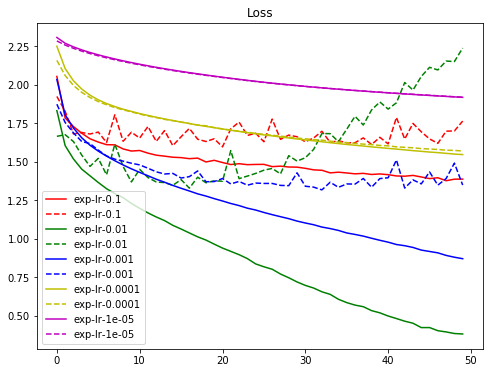

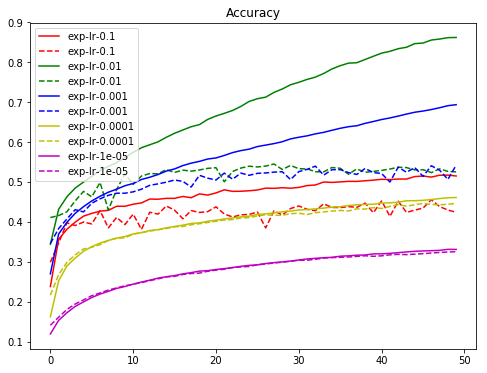

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()